In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

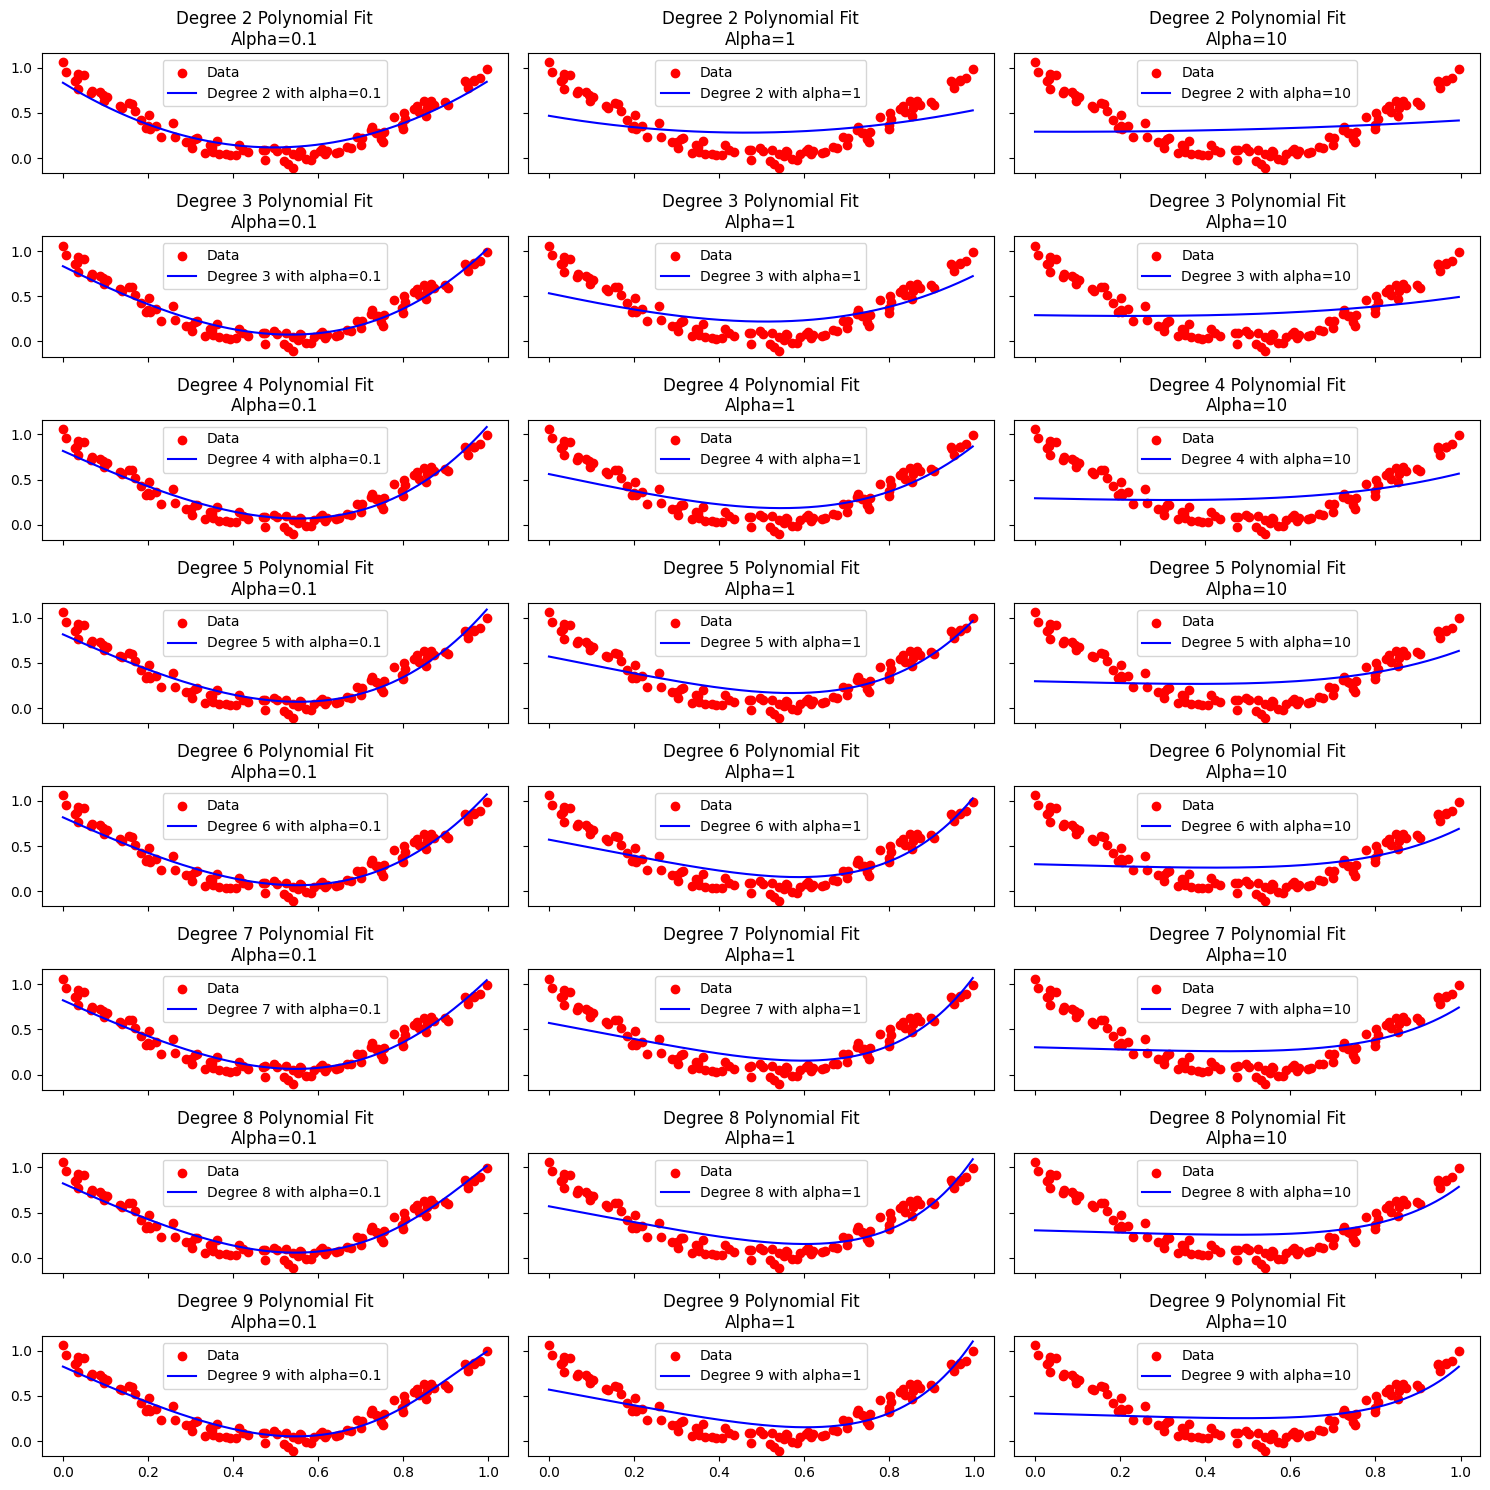

In [ ]:
# Load data from CSV
data = pd.read_csv('/content/drive/MyDrive/CS699-AS4/Group01_Assignment4_code/UnivariateData/100TrainingData - Sheet1.csv')
X = data[['x']]
y = data['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to perform polynomial regression with regularization (Ridge) from scratch
def polynomial_regression(X, y, degree, alpha=0.0):
    X_poly = np.c_[np.ones(X.shape[0]), X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_poly.shape[1])
    weights = np.linalg.inv(X_poly.T.dot(X_poly) + alpha * identity).dot(X_poly.T).dot(y)

    return weights

# Function to predict using polynomial regression from scratch
def predict(X, weights, degree):
    X_poly = np.c_[np.ones(X.shape[0]), X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]
    return X_poly.dot(weights)

# Define the degrees of the polynomial
degrees = np.arange(2, 10)

# Define the values of alpha (regularization parameter)
alphas = [0.1, 1, 10]

# Create subplots for different degrees of polynomials
fig, axs = plt.subplots(len(degrees), len(alphas), figsize=(15, 15), sharex=True, sharey=True)

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Plot the data points
        axs[i, j].scatter(X_train, y_train, color='red', label='Data')

        # Plot the approximated function
        x_range = np.linspace(X.min().values, X.max().values, 1000)
        y_pred = predict(x_range, weights, degree)
        axs[i, j].plot(x_range, y_pred, color='blue', label=f'Degree {degree} with alpha={alpha}')
        axs[i, j].set_title(f'Degree {degree} Polynomial Fit\nAlpha={alpha}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


In [ ]:
best_degree = None
best_alpha = None
best_mse = float('inf')  # Initialize with a high value

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Calculate mean squared error or any other evaluation metric
        y_pred = predict(X_test.values, weights, degree)
        mse = np.mean((y_test - y_pred) ** 2)

        # Check if this model has the lowest MSE
        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_alpha = alpha

            # Get the weights before regularization
            X_poly = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_poly = np.c_[X_poly, X_train.values ** d]
            weights_before_reg = np.linalg.lstsq(X_poly, y_train, rcond=None)[0]

            # Set alpha to 0 to turn off regularization and get weights after regularization
            X_poly_reg = np.c_[np.ones(X_train.shape[0]), X_train]
            for d in range(2, best_degree + 1):
                X_poly_reg = np.c_[X_poly_reg, X_train.values ** d]
            weights_after_reg = np.linalg.lstsq(X_poly_reg.T.dot(X_poly_reg) + best_alpha * np.eye(X_poly_reg.shape[1]),
                                                 X_poly_reg.T.dot(y_train), rcond=None)[0]
        print(f'Degree: {degree}, Alpha: {alpha}')
        print(f'Weights before regularization: {weights_before_reg}')
        print(f'Weights after regularization: {weights_after_reg}')
        print('=' * 30)



Degree: 2, Alpha: 0.1
Weights before regularization: [ 1.01866112 -3.94279714  3.94681634]
Weights after regularization: [ 0.83429971 -2.88075391  2.90240479]
Degree: 2, Alpha: 1
Weights before regularization: [ 1.01866112 -3.94279714  3.94681634]
Weights after regularization: [ 0.83429971 -2.88075391  2.90240479]
Degree: 2, Alpha: 10
Weights before regularization: [ 1.01866112 -3.94279714  3.94681634]
Weights after regularization: [ 0.83429971 -2.88075391  2.90240479]
Degree: 3, Alpha: 0.1
Weights before regularization: [ 1.02448123 -4.01726747  4.13603197 -0.12742006]
Weights after regularization: [ 0.83214198 -2.31935499  0.73881915  1.78305523]
Degree: 3, Alpha: 1
Weights before regularization: [ 1.02448123 -4.01726747  4.13603197 -0.12742006]
Weights after regularization: [ 0.83214198 -2.31935499  0.73881915  1.78305523]
Degree: 3, Alpha: 10
Weights before regularization: [ 1.02448123 -4.01726747  4.13603197 -0.12742006]
Weights after regularization: [ 0.83214198 -2.31935499  0.73

#Best Degree, Alpha, MSE

In [ ]:
# Print the best degree, alpha, and corresponding weights before and after regularization
print(f'Best Degree: {best_degree}')
print(f'Best Alpha: {best_alpha}')
print(f'Weights before regularization: {weights_before_reg}')
print(f'Weights after regularization: {weights_after_reg}')
print(f'Best Mean Squared Error: {best_mse}')

Best Degree: 9
Best Alpha: 0.1
Weights before regularization: [ 1.04103262e+00 -8.06770958e+00  1.04322453e+02 -9.24613595e+02
  4.30014276e+03 -1.13286149e+04  1.76284954e+04 -1.60366598e+04
  7.87850358e+03 -1.61354759e+03]
Weights after regularization: [ 0.82368613 -2.09554937  0.35808208  0.97351909  0.87550433  0.57425786
  0.25125363 -0.03490986 -0.27005004 -0.45563579]
Best Mean Squared Error: 0.007953795063764877


#MSE

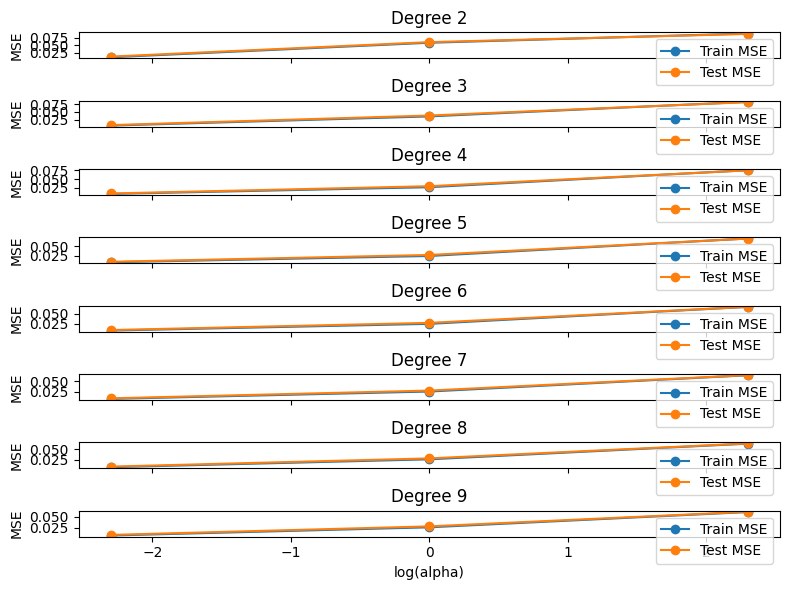

In [ ]:
# Initialize arrays to store MSE values
train_mses = np.zeros((len(degrees), len(alphas)))
test_mses = np.zeros((len(degrees), len(alphas)))

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to perform polynomial regression with regularization (Ridge)
def polynomial_regression(X, y, degree, alpha=0.0):
    X_poly = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** d]  # Add polynomial features up to the specified degree

    # Compute weights using Ridge regression formula (without matrix inversion)
    identity = np.eye(X_poly.shape[1])
    weights = np.linalg.inv(X_poly.T.dot(X_poly) + alpha * identity).dot(X_poly.T).dot(y)

    return weights

# Function to predict using polynomial regression
def predict(X, weights):
    X_poly = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
    for d in range(2, len(weights)):
        X_poly = np.c_[X_poly, X ** d]  # Add polynomial features up to the specified degree
    return X_poly.dot(weights)

# Iterate over degrees and alphas and calculate MSE for each combination
for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Perform polynomial regression to get weights
        weights = polynomial_regression(X_train.values, y_train.values, degree, alpha)

        # Predict on training and test data
        y_train_pred = predict(X_train.values, weights)
        y_test_pred = predict(X_test.values, weights)

        # Calculate MSE for training and test data
        train_mse = np.mean((y_train - y_train_pred) ** 2)
        test_mse = np.mean((y_test - y_test_pred) ** 2)

        # Store MSE values
        train_mses[i, j] = train_mse
        test_mses[i, j] = test_mse

# Plot MSE values
fig, axs = plt.subplots(len(degrees), 1, figsize=(8, 6), sharex=True)

for i, degree in enumerate(degrees):
    axs[i].plot(np.log(alphas), train_mses[i, :], label='Train MSE', marker='o')
    axs[i].plot(np.log(alphas), test_mses[i, :], label='Test MSE', marker='o')
    axs[i].set_title(f'Degree {degree}')
    axs[i].set_ylabel('MSE')
    axs[i].legend()

plt.xlabel('log(alpha)')
plt.tight_layout()
plt.show()

#Model Output vs Target Output

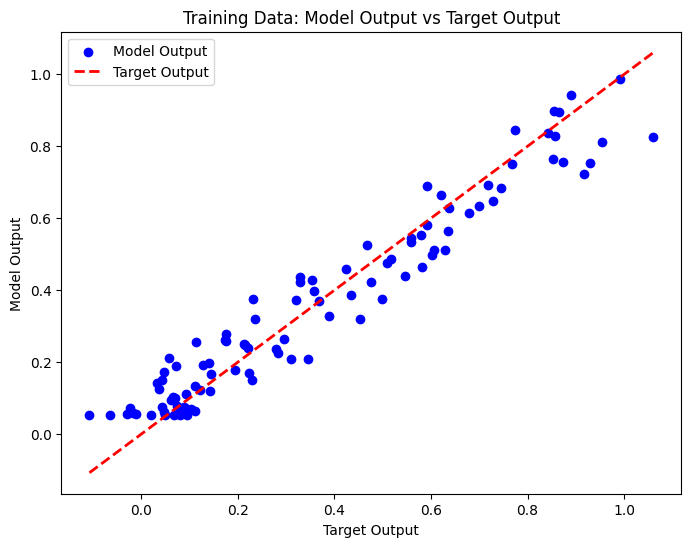

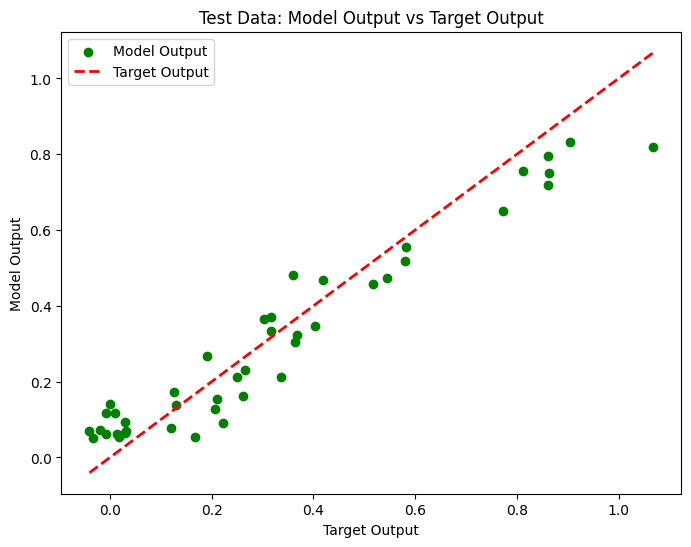

In [ ]:
# Define functions for polynomial regression and Ridge regression with regularization

def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree + 1):
        X_poly = np.concatenate((X_poly, X ** d), axis=1)
    return X_poly

def ridge_regression(X, y, alpha=0.0):
    identity = np.eye(X.shape[1])
    weights = np.linalg.inv(X.T.dot(X) + alpha * identity).dot(X.T).dot(y)
    return weights

# best_degree and best_alpha are obtained from cross-validation results
best_degree = 9
best_alpha = 0.1

# Perform polynomial regression with regularization
X_train_poly = polynomial_features(X_train, best_degree)
X_test_poly = polynomial_features(X_test, best_degree)

# Add a column of ones for the bias term
X_train_poly = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]
X_test_poly = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

# Compute weights using Ridge regression with the best alpha
weights = ridge_regression(X_train_poly, y_train, alpha=best_alpha)

# Predictions on training and test data
y_train_pred = X_train_poly.dot(weights)
y_test_pred = X_test_poly.dot(weights)

# Plot model output vs target output for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Model Output')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Training Data: Model Output vs Target Output')
plt.legend()
plt.show()

# Plot model output vs target output for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Model Output')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Target Output')
plt.xlabel('Target Output')
plt.ylabel('Model Output')
plt.title('Test Data: Model Output vs Target Output')
plt.legend()
plt.show()
